<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Pothole%20detection%20on%20roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installattion Instructions



## 2. Use trained model to detect potholes in images



## 3. How to train using pothole dataset

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/3_mxrcnn/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
# Download trained model

In [4]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FjQ4HGeCKcq0idkXq1JCQ2B501pvxlmb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FjQ4HGeCKcq0idkXq1JCQ2B501pvxlmb" -O pothole_trained.zip && rm -rf /tmp/cookies.txt

In [5]:
! unzip -qq pothole_trained.zip

In [6]:
class_file = set_class_list("pothole_trained/classes.txt");

In [7]:
#Model - Select the model as per number of iterations it has been trained for

In [8]:
set_model_params(model_name="vgg16", model_path="pothole_trained/model_vgg16-0050.params");

In [9]:
#Hyper Params

In [10]:
set_hyper_params(gpus="0", batch_size=1);

In [11]:
# Preprocessing

In [12]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [13]:
#Initalization

In [14]:
initialize_rpn_params();

In [15]:
initialize_rcnn_params();

In [16]:
#Network

In [17]:
sym = set_network();
mod = load_model(sym);

In [18]:
#Load Image and infer

pothole
 0.9950724244117737 [109.65555071009518, 303.28242910581656, 441.5280866987249, 492.36453810607287]
pothole
 0.9883765578269958 [503.1345823081632, 246.1549497164476, 658.0930820964118, 353.84971546768463]
['pothole\n', 0.9950724244117737, [109.65555071009518, 303.28242910581656, 441.5280866987249, 492.36453810607287]]


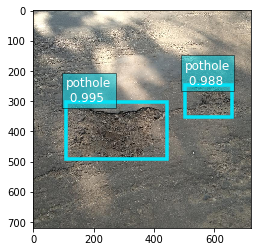

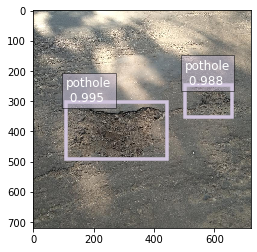

In [19]:
set_output_params(vis_thresh=0.9, vis=True)
output = Infer("pothole_trained/test/img1.jpg", mod);

pothole
 0.9934719800949097 [262.27628799143525, 223.77878341147382, 430.1329570325126, 345.9666220180183]
pothole
 0.9688704013824463 [180.87446109949258, 396.93728973716, 273.4841190691976, 489.78970894312164]
['pothole\n', 0.9934719800949097, [262.27628799143525, 223.77878341147382, 430.1329570325126, 345.9666220180183]]


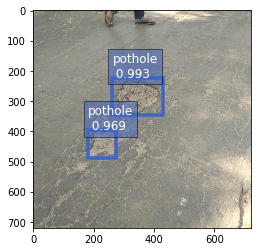

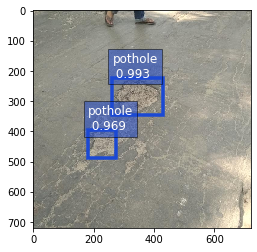

In [20]:
set_output_params(vis_thresh=0.9, vis=True)
output = Infer("pothole_trained/test/img2.jpg", mod);

pothole
 0.990498960018158 [297.53101295306715, 305.2824718781107, 409.94202637534204, 391.8427461586653]
['pothole\n', 0.990498960018158, [297.53101295306715, 305.2824718781107, 409.94202637534204, 391.8427461586653]]


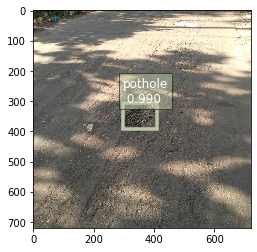

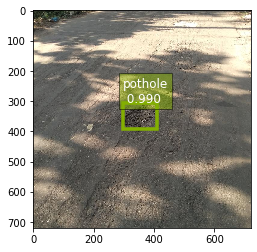

In [23]:
set_output_params(vis_thresh=0.95, vis=True)
output = Infer("pothole_trained/test/img3.jpg", mod);

pothole
 0.9970716238021851 [232.75135442617784, 172.91158859518978, 483.30880058547973, 335.119710138314]
['pothole\n', 0.9970716238021851, [232.75135442617784, 172.91158859518978, 483.30880058547973, 335.119710138314]]


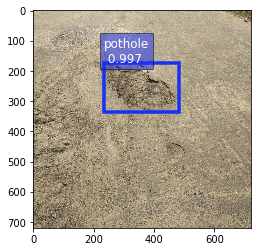

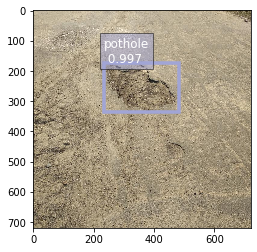

In [24]:
set_output_params(vis_thresh=0.95, vis=True)
output = Infer("pothole_trained/test/img4.jpg", mod);

pothole
 0.9712972640991211 [663.5172698161506, 670.3784828597095, 1480.0876009993653, 857.8879060680816]
pothole
 0.942879319190979 [336.5820678998652, 603.0878629796476, 663.1218663930935, 683.5124415683625]
pothole
 0.8998867869377136 [820.853007365497, 913.4692192694688, 1818.1799111349865, 1022.8399500078702]
pothole
 0.876976728439331 [294.5744393377876, 934.4859748340548, 710.5784973743935, 1012.2996355816304]
pothole
 0.8481737375259399 [844.4962325282746, 903.3932914172113, 1089.1326469630735, 1009.2761518426869]
pothole
 0.8438343405723572 [261.1405499806851, 301.62288442785945, 443.4341915836312, 394.2994704743883]
pothole
 0.8390966057777405 [1069.033222896621, 732.6701570612473, 1453.2258286306155, 797.3306971138018]
pothole
 0.820253849029541 [242.90317111130952, 610.7086127292476, 1665.9544254110676, 990.4058720032683]
['pothole\n', 0.9712972640991211, [663.5172698161506, 670.3784828597095, 1480.0876009993653, 857.8879060680816]]


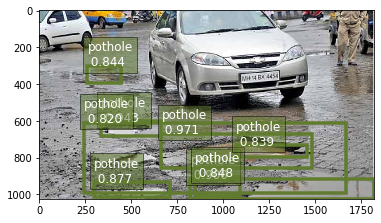

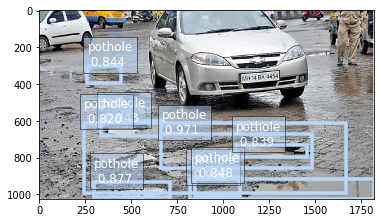

In [29]:
set_output_params(vis_thresh=0.8, vis=True)
output = Infer("pothole_trained/test/img5.jpg", mod);

pothole
 0.9957120418548584 [156.57464201526895, 182.65785162266818, 274.49927843926446, 236.18372903352028]
pothole
 0.9853863716125488 [107.66314094613683, 145.27802718653274, 225.15142802397182, 178.55671641379328]
pothole
 0.9523274898529053 [202.01945338777062, 54.87493307977739, 291.51944245985476, 76.23846452384737]
pothole
 0.9411954879760742 [127.2533131212865, 113.30360572419086, 199.43481922574762, 141.90724172825733]
pothole
 0.9046769738197327 [148.69046349428916, 115.66716581425386, 221.72427064649338, 234.9198627284014]
pothole
 0.8606194853782654 [273.0369221387056, 0.7232599734207623, 325.4325771993598, 16.012517662376627]
['pothole\n', 0.9957120418548584, [156.57464201526895, 182.65785162266818, 274.49927843926446, 236.18372903352028]]


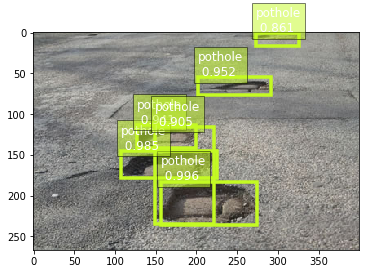

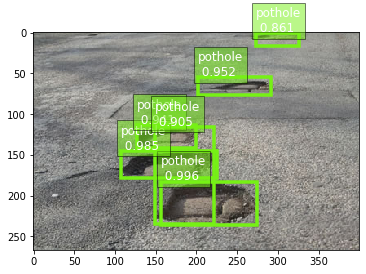

In [31]:
set_output_params(vis_thresh=0.85, vis=True)
output = Infer("pothole_trained/test/img6.jpg", mod);

pothole
 0.9723618030548096 [84.93363698621364, 365.16968264304336, 524.2857016601733, 497.833164320639]
pothole
 0.9375462532043457 [372.0767870837689, 220.399799612166, 1055.2805478626449, 292.35494395826055]
pothole
 0.9220501780509949 [20.923985325366367, 456.5252918561899, 202.10737459281552, 668.6238734973679]
pothole
 0.9092584252357483 [772.2997226394733, 224.33908486113634, 881.8270960910089, 266.44659034575085]
pothole
 0.8899339437484741 [419.7286803444573, 214.05136711857193, 697.7645593154091, 271.3516253281264]
['pothole\n', 0.9723618030548096, [84.93363698621364, 365.16968264304336, 524.2857016601733, 497.833164320639]]


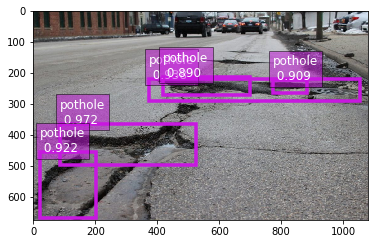

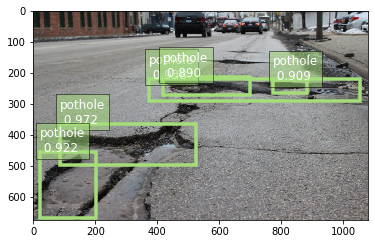

In [32]:
set_output_params(vis_thresh=0.85, vis=True)
output = Infer("pothole_trained/test/img7.jpg", mod);

pothole
 0.9788532853126526 [245.0558349609375, 219.602734375, 437.7943359375, 312.4978515625]
pothole
 0.8982967138290405 [532.2888671875, 268.3476318359375, 610.94091796875, 316.1823974609375]
pothole
 0.8982408046722412 [166.78828125, 163.675048828125, 226.873828125, 200.3756591796875]
pothole
 0.8538920283317566 [451.009326171875, 240.5260986328125, 521.778076171875, 298.5822998046875]
['pothole\n', 0.9788532853126526, [245.0558349609375, 219.602734375, 437.7943359375, 312.4978515625]]


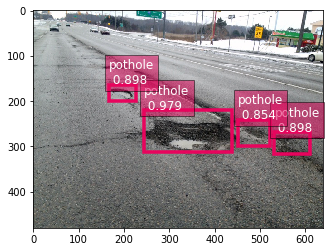

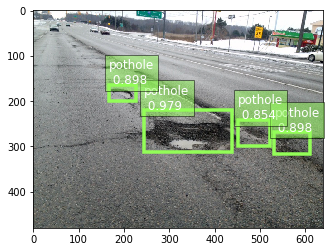

In [33]:
set_output_params(vis_thresh=0.85, vis=True)
output = Infer("pothole_trained/test/img8.jpg", mod);

pothole
 0.9902132153511047 [381.05267017414644, 269.63177014595334, 465.6406927465825, 329.9470580513267]
pothole
 0.9790213108062744 [131.47213786340532, 258.3668255304872, 479.6878501551552, 332.08531333334633]
pothole
 0.9628428816795349 [260.3740358923502, 209.90111419092148, 355.7505568584727, 262.9104744577226]
pothole
 0.9547598361968994 [137.10805530048773, 210.3800521729224, 373.8919579877716, 288.83110766274666]
pothole
 0.9010148048400879 [135.46140264263698, 247.2643220139652, 272.3131641537609, 306.4618712865346]
pothole
 0.8668838739395142 [425.4075621706448, 156.02858651600545, 517.8926879110103, 196.05615770743162]
pothole
 0.8216373920440674 [181.27178595305725, 214.70938805365174, 270.0031507563178, 250.267543104955]
['pothole\n', 0.9902132153511047, [381.05267017414644, 269.63177014595334, 465.6406927465825, 329.9470580513267]]


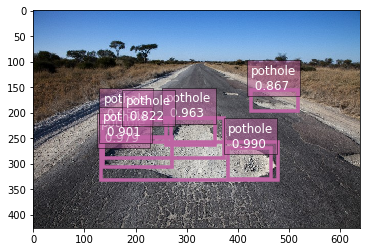

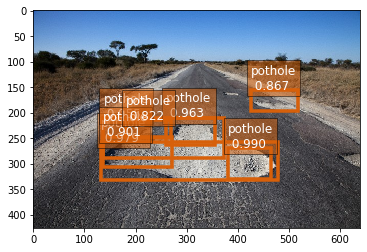

In [39]:
set_output_params(vis_thresh=0.8, vis=True)
output = Infer("pothole_trained/test/img10.jpg", mod);

pothole
 0.9626936316490173 [295.9467679428752, 619.3908144490885, 500.5700099953931, 672.346488487527]
pothole
 0.9384742975234985 [420.3167279085924, 559.841039966663, 652.1815013993098, 634.7903884588977]
pothole
 0.9114106297492981 [296.5805936362915, 638.335378646485, 409.58907383202467, 692.4109270715818]
pothole
 0.9060060977935791 [333.2386775478953, 577.9363779749548, 528.5664070153593, 653.805159261386]
pothole
 0.905360996723175 [547.0167105442888, 585.2478889118305, 660.0936045899592, 633.7913033604069]
pothole
 0.8805502653121948 [774.3419195522208, 319.3940005653564, 900.9522258763062, 366.1155324071669]
pothole
 0.8787935376167297 [394.22531637143584, 587.929040991955, 493.21878856799316, 631.3632960189059]
pothole
 0.8746670484542847 [411.4791389654821, 539.2865430864395, 548.891855328394, 602.8732166385871]
pothole
 0.8682632446289062 [636.4147402907113, 394.52673056067727, 781.5987610953457, 471.31301694759037]
pothole
 0.8680710196495056 [760.1843200489634, 350.74899

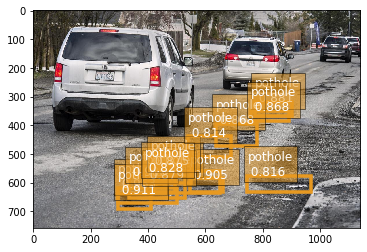

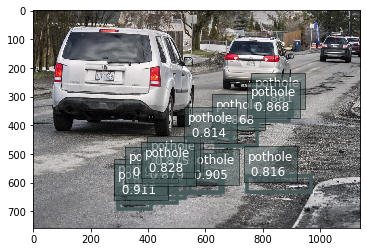

In [43]:
set_output_params(vis_thresh=0.8, vis=True)
output = Infer("pothole_trained/test/img11.jpg", mod);

# Train you own detector

# Download Dataset

- credits: https://www.kaggle.com/chitholian/annotated-potholes-dataset

In [6]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LSBBmntmLAloPO5Cc3ar61ranfBx8D8W' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1LSBBmntmLAloPO5Cc3ar61ranfBx8D8W" -O ir_dataset.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip ir_dataset.zip

# Desired annotation - COCO Format

## Dataset Directory Structure

    ./ (root_dir)
          |
          |------potholes (coco_dir) 
          |         |
          |         |---images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_images.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from train_base import *

In [3]:
# Dataset params

In [4]:
root_dir = "./";
coco_dir = "potholes";
img_dir = "images"; 

In [5]:
set_dataset_params(root_dir=root_dir, 
                   coco_dir=coco_dir, imageset=img_dir);

In [6]:
# Model Type

In [7]:
set_model_params(model_name="vgg16");

In [8]:
# Hyper Params

In [9]:
set_hyper_params(gpus="0", lr=0.001, lr_decay_epoch="1", epochs=2, batch_size=1);

In [10]:
set_output_params(log_interval=100, save_prefix="model_vgg16");

In [11]:
# Preprocessing params

In [12]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [13]:
# Initialize params

In [14]:
initialize_rpn_params();

In [15]:
initialize_rcnn_params();

In [16]:
# Remove caches if any

In [17]:
if os.path.isdir("./cache/"):
    os.system("rm -r ./cache/")

In [18]:
# Invoke Dataloader

In [19]:
roidb = set_dataset();

INFO:root:computing cache ./cache/coco_images_roidb.pkl
INFO:root:saving cache ./cache/coco_images_roidb.pkl
INFO:root:coco_images num_images 665
INFO:root:filter roidb: 665 -> 665
INFO:root:coco_images append flipped images to roidb


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [20]:
#Network

In [21]:
sym = set_network();

In [22]:
# Train

In [23]:
train(sym, roidb);

INFO:root:max input shape
{'bbox_target': (1, 36, 62, 62),
 'bbox_weight': (1, 36, 62, 62),
 'data': (1, 3, 1000, 1000),
 'gt_boxes': (1, 100, 5),
 'im_info': (1, 3),
 'label': (1, 1, 558, 62)}
INFO:root:max output shape
{'bbox_loss_reshape_output': (1, 128, 8),
 'blockgrad0_output': (1, 128),
 'cls_prob_reshape_output': (1, 128, 2),
 'rpn_bbox_loss_output': (1, 36, 62, 62),
 'rpn_cls_prob_output': (1, 2, 558, 62)}
INFO:root:locking params
['conv1_1_weight',
 'conv1_1_bias',
 'conv1_2_weight',
 'conv1_2_bias',
 'conv2_1_weight',
 'conv2_1_bias',
 'conv2_2_weight',
 'conv2_2_bias',
 'conv3_1_weight',
 'conv3_1_bias',
 'conv3_2_weight',
 'conv3_2_bias',
 'conv3_3_weight',
 'conv3_3_bias',
 'conv4_1_weight',
 'conv4_1_bias',
 'conv4_2_weight',
 'conv4_2_bias',
 'conv4_3_weight',
 'conv4_3_bias']
INFO:root:lr 0.001000 lr_epoch_diff [1] lr_iters [1330]
INFO:root:Epoch[0] Batch [0-100]	Speed: 4.71 samples/sec	RPNAcc=0.926091	RPNLogLoss=0.251855	RPNL1Loss=0.887560	RCNNAcc=0.874691	RCNNLogLoss

# Running Inference

In [24]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [25]:
from infer_base import *

In [26]:
class_file = set_class_list("./potholes/annotations/classes.txt");

In [27]:
#Model - Select the model as per number of iterations it has been trained for

In [28]:
set_model_params(model_name="vgg16", model_path="trained_model/model_vgg16-0002.params");

In [29]:
#Hyper Params

In [30]:
set_hyper_params(gpus="0", batch_size=1);

In [31]:
# Preprocessing

In [32]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [33]:
#Initalization

In [34]:
initialize_rpn_params();

In [35]:
initialize_rcnn_params();

In [36]:
#Network

In [37]:
sym = set_network();
mod = load_model(sym);

In [13]:
#Load Image and infer

pothole
 0.9795548319816589 [104.9131189564018, 319.1204299717052, 470.7664418880091, 494.5916499755776]
pothole
 0.9571921229362488 [495.02711141174103, 237.62893632957784, 676.3035805774589, 355.931404970441]
['pothole\n', 0.9795548319816589, [104.9131189564018, 319.1204299717052, 470.7664418880091, 494.5916499755776]]


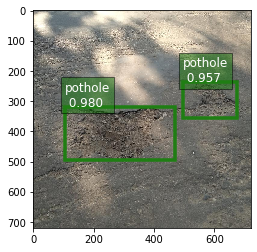

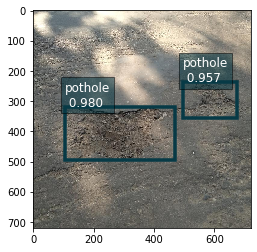

In [39]:
set_output_params(vis_thresh=0.9, vis=True)
output = Infer("potholes/test/img1.jpg", mod);

pothole
 0.9936402440071106 [256.6285095364692, 222.4799247379285, 430.78071095420626, 350.9822105165055]
pothole
 0.9602333307266235 [188.20344076641658, 370.45229154711467, 277.7115483692061, 497.06320765169164]
['pothole\n', 0.9936402440071106, [256.6285095364692, 222.4799247379285, 430.78071095420626, 350.9822105165055]]


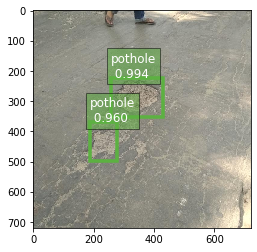

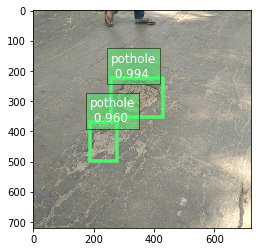

In [41]:
set_output_params(vis_thresh=0.9, vis=True)
output = Infer("potholes/test/img2.jpg", mod);